In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%cd /kaggle/working
!git clone https://github.com/mHemaAP/S13.git
#!git clone https://github.com/stmhap/EvS13_dev7.git
# the training of this run using my different git account 'stmhap' on kaggle,
# and the final copy is checked-in to the 'mHemaAP' git account
# Since after multiple runs using the EvS13_dev7 copy in git account 'stmhap',
# logs here contain the references to the folder EvS13_dev7 after git clone
# in reality, this is the same as the files checked-in to S13 of 'mHemaAP' git account
%cd EvS13_dev7

/kaggle/working
Cloning into 'EvS13_dev7'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 2), reused 13 (delta 2), pack-reused 0
Receiving objects: 100% (16/16), 17.12 KiB | 2.85 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/kaggle/working/EvS13_dev7


In [ ]:
!mkdir -p checkpoints
!ln -s /kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC PASCAL_VOC
!ls

PASCAL_VOC  checkpoints  dataset.py  model.py	       train.py  yolo3.py
README.md   config.py	 loss.py     requirements.txt  utils.py


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.4 MB/s eta 0:00:00:00:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=0534d22f6c66d36d8611b37530c3558f307312e1692e0b7045869b0f534570fe
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [ ]:
import torch
from model import Yolo3_PL_Model
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelSummary, LearningRateMonitor, ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Device Selected: cuda


In [ ]:
yolo3_model = Yolo3_PL_Model(learning_rate=0.00072, nepochs=40)
yolo3_trainer = Trainer(max_epochs=40, precision='16-mixed', devices=-1,
                  callbacks=[
                      ModelSummary(max_depth=10),
                      LearningRateMonitor(logging_interval='step'),
                      ModelCheckpoint(
                          dirpath='checkpoints/',
                          filename='{epoch}-{val_loss:.2f}',
                          save_last=True
                      )])

Sanity Checking: 0it [00:00, ?it/s]

Val loss 47.28369903564453


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Val loss 16.37659454345703
=> Saving checkpoint
Epoch:  1
Train loss 24.318443298339844


Validation: 0it [00:00, ?it/s]

Val loss 14.733415603637695
=> Saving checkpoint
Epoch:  2
Train loss 14.264181137084961


Validation: 0it [00:00, ?it/s]

Val loss 11.373082160949707
=> Saving checkpoint
Epoch:  3
Train loss 12.834939956665039


Validation: 0it [00:00, ?it/s]

Val loss 12.598888397216797
=> Saving checkpoint
Epoch:  4
Train loss 11.79633903503418


Validation: 0it [00:00, ?it/s]

Val loss 9.734611511230469
=> Saving checkpoint
Epoch:  5
Train loss 10.88507080078125


Validation: 0it [00:00, ?it/s]

Val loss 10.154257774353027
=> Saving checkpoint
Epoch:  6
Train loss 10.15014934539795


Validation: 0it [00:00, ?it/s]

Val loss 9.984532356262207
=> Saving checkpoint
Epoch:  7
Train loss 9.61656665802002


Validation: 0it [00:00, ?it/s]

Val loss 13.46885871887207
=> Saving checkpoint
Epoch:  8
Train loss 9.245770454406738


Validation: 0it [00:00, ?it/s]

Val loss 7.958877086639404
=> Saving checkpoint
Epoch:  9
Train loss 8.842897415161133


Validation: 0it [00:00, ?it/s]

Val loss 7.718028545379639
=> Saving checkpoint
Epoch:  10
Train loss 8.466474533081055


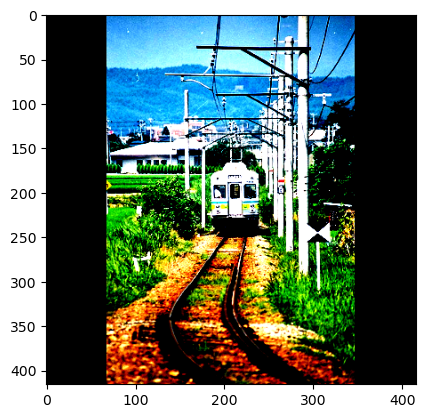

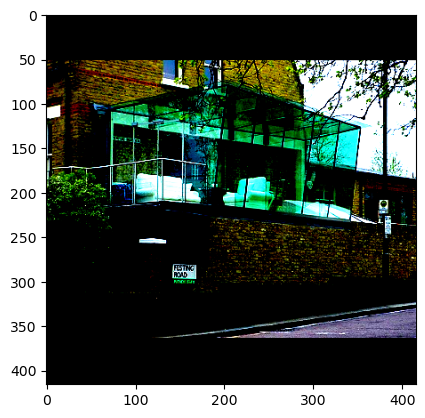

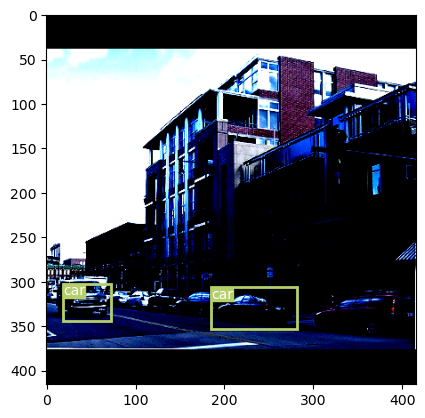

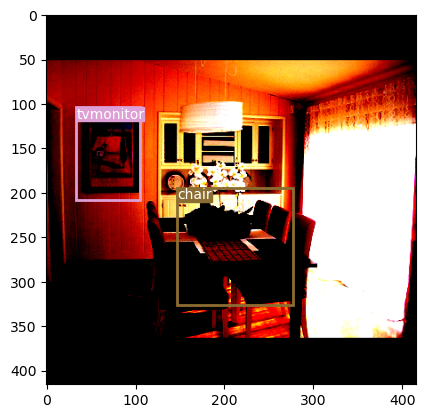

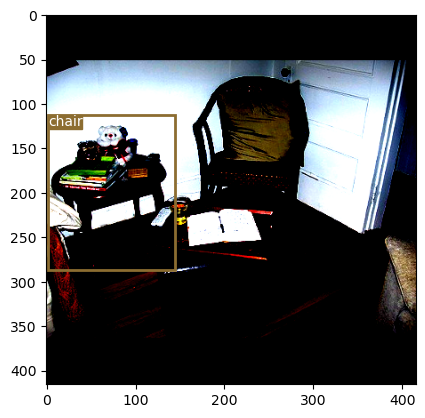

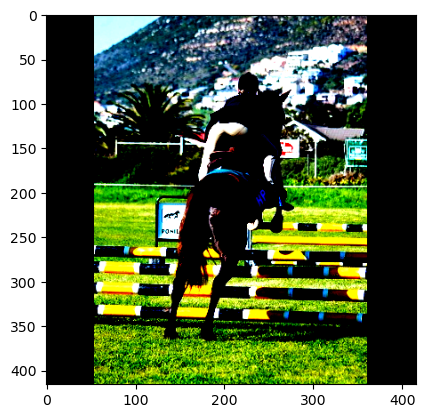

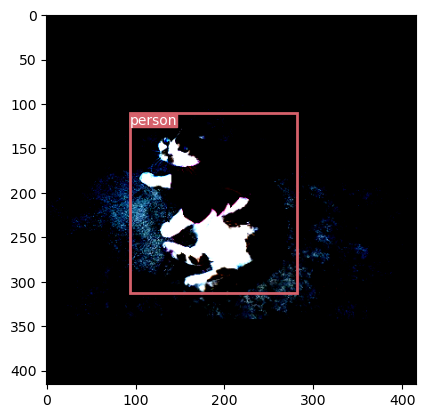

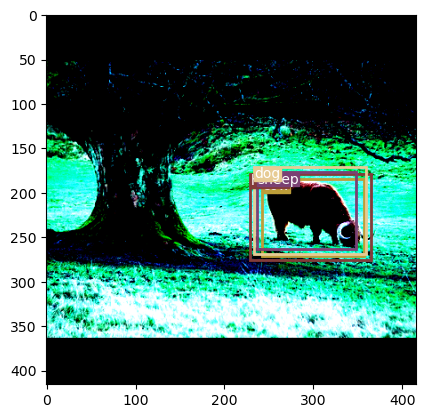

On Train loader:



100%|██████████| 518/518 [11:49<00:00,  1.37s/it]


Class accuracy is: 54.984592%
No obj accuracy is: 97.560005%
Obj accuracy is: 53.779854%


Validation: 0it [00:00, ?it/s]

Val loss 8.034782409667969
=> Saving checkpoint
Epoch:  11
Train loss 8.207856178283691


Validation: 0it [00:00, ?it/s]

Val loss 9.491352081298828
=> Saving checkpoint
Epoch:  12
Train loss 7.931126594543457


Validation: 0it [00:00, ?it/s]

Val loss 7.473977088928223
=> Saving checkpoint
Epoch:  13
Train loss 7.843637466430664


Validation: 0it [00:00, ?it/s]

Val loss 6.80726432800293
=> Saving checkpoint
Epoch:  14
Train loss 7.630908489227295


Validation: 0it [00:00, ?it/s]

Val loss 7.7870192527771
=> Saving checkpoint
Epoch:  15
Train loss 7.396205902099609


Validation: 0it [00:00, ?it/s]

Val loss 6.937565326690674
=> Saving checkpoint
Epoch:  16
Train loss 7.232608318328857


Validation: 0it [00:00, ?it/s]

Val loss 6.827914714813232
=> Saving checkpoint
Epoch:  17
Train loss 7.035586357116699


Validation: 0it [00:00, ?it/s]

Val loss 6.390932559967041
=> Saving checkpoint
Epoch:  18
Train loss 6.887364387512207


Validation: 0it [00:00, ?it/s]

Val loss 5.751155853271484
=> Saving checkpoint
Epoch:  19
Train loss 6.710473537445068


Validation: 0it [00:00, ?it/s]

Val loss 5.919820308685303
=> Saving checkpoint
Epoch:  20
Train loss 6.6272687911987305


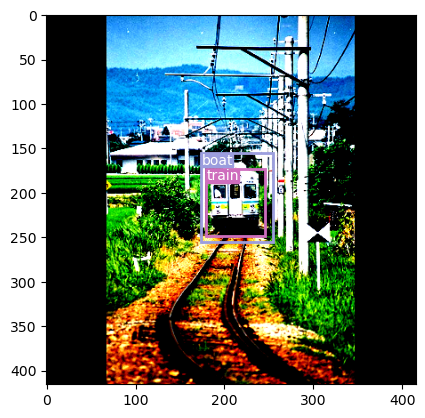

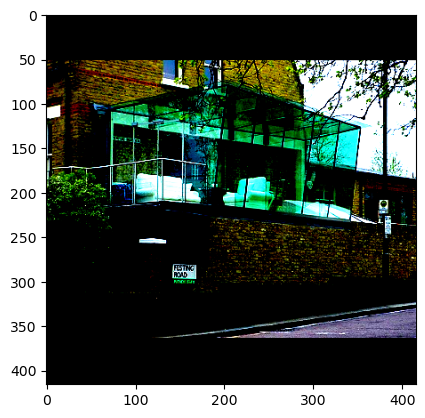

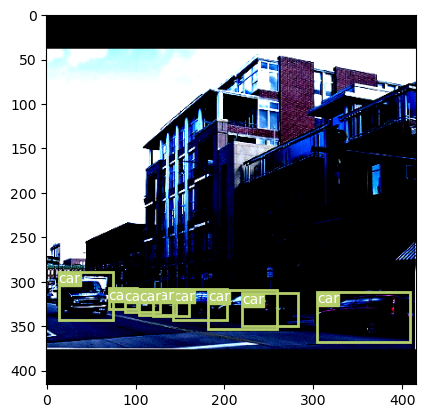

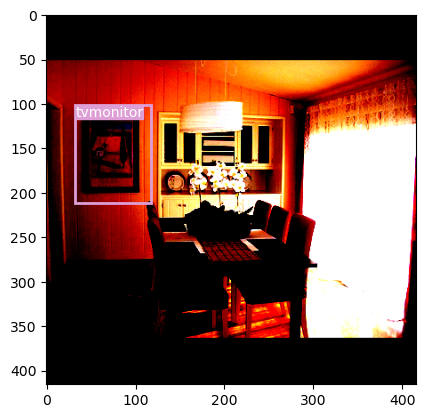

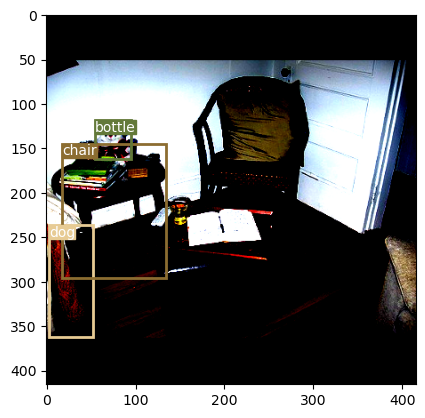

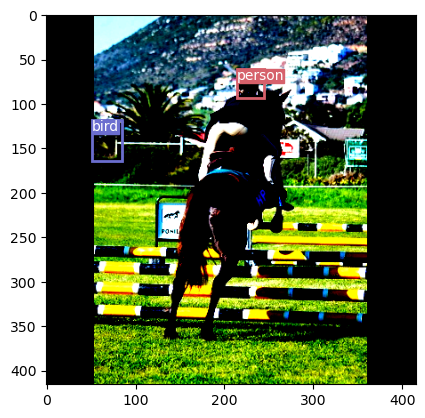

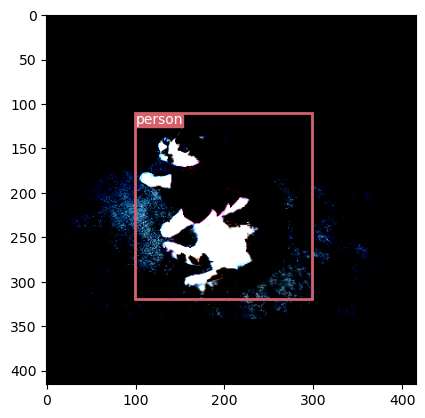

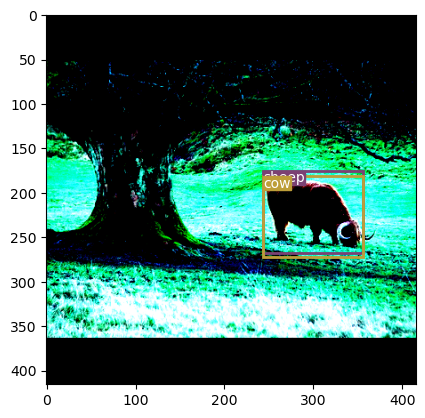

On Train loader:



100%|██████████| 518/518 [11:23<00:00,  1.32s/it]


Class accuracy is: 66.655014%
No obj accuracy is: 97.860893%
Obj accuracy is: 62.321495%


Validation: 0it [00:00, ?it/s]

Val loss 5.732606410980225
=> Saving checkpoint
Epoch:  21
Train loss 6.445239067077637


Validation: 0it [00:00, ?it/s]

Val loss 5.372905731201172
=> Saving checkpoint
Epoch:  22
Train loss 6.346033573150635


Validation: 0it [00:00, ?it/s]

Val loss 6.37935209274292
=> Saving checkpoint
Epoch:  23
Train loss 6.228211879730225


Validation: 0it [00:00, ?it/s]

Val loss 5.303606986999512
=> Saving checkpoint
Epoch:  24
Train loss 6.055826663970947


Validation: 0it [00:00, ?it/s]

Val loss 5.259615898132324
=> Saving checkpoint
Epoch:  25
Train loss 5.932065010070801


Validation: 0it [00:00, ?it/s]

Val loss 4.722172260284424
=> Saving checkpoint
Epoch:  26
Train loss 5.809210300445557


Validation: 0it [00:00, ?it/s]

Val loss 5.012941837310791
=> Saving checkpoint
Epoch:  27
Train loss 5.654068470001221


Validation: 0it [00:00, ?it/s]

Val loss 4.530495643615723
=> Saving checkpoint
Epoch:  28
Train loss 5.534124851226807


Validation: 0it [00:00, ?it/s]

Val loss 4.496711730957031
=> Saving checkpoint
Epoch:  29
Train loss 5.386844158172607


Validation: 0it [00:00, ?it/s]

Val loss 4.5048041343688965
=> Saving checkpoint
Epoch:  30
Train loss 5.245379447937012


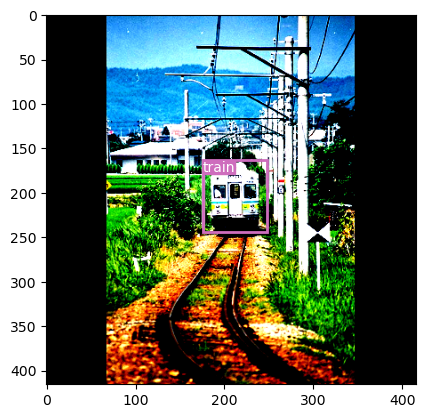

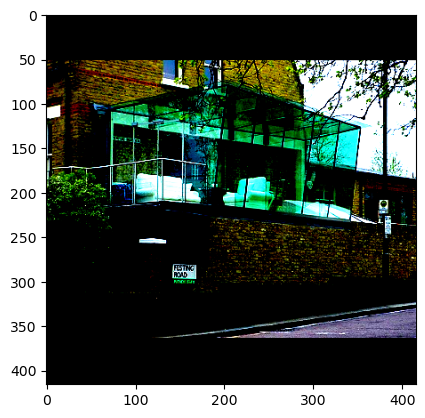

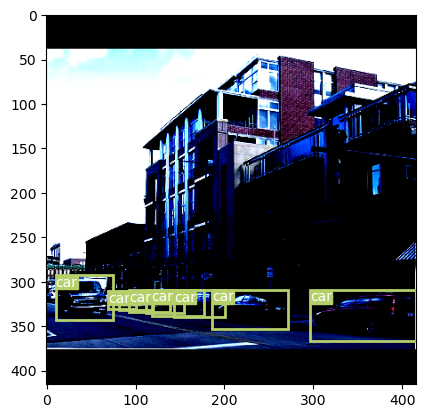

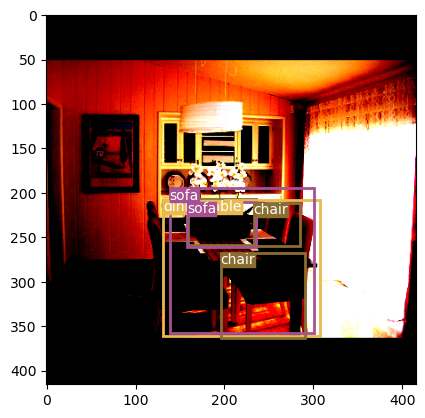

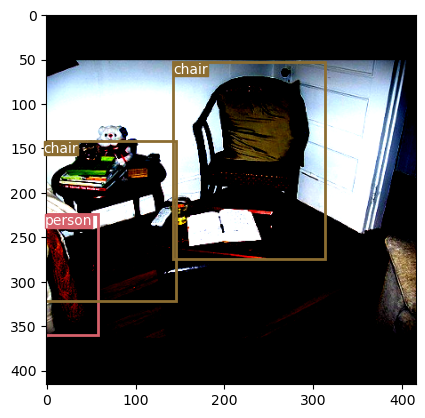

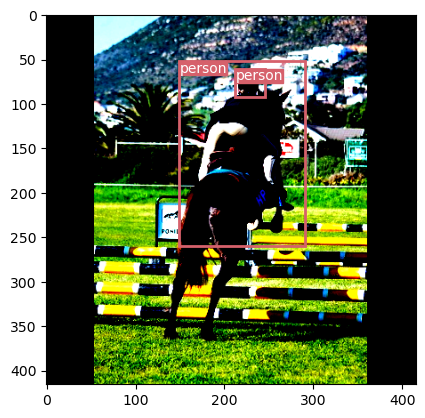

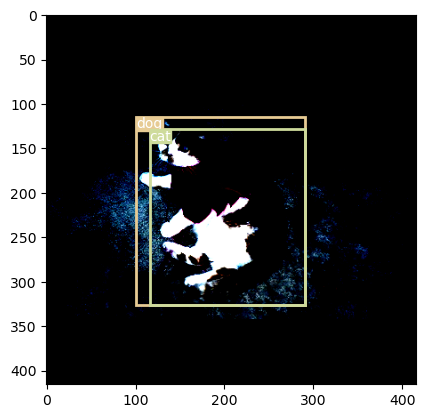

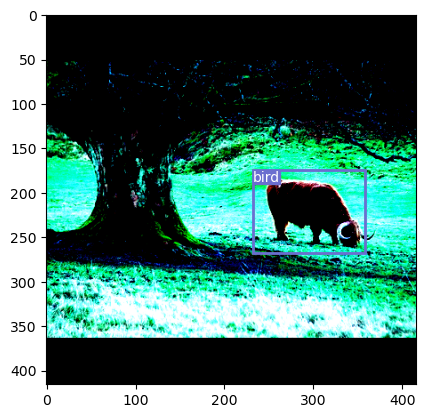

On Train loader:



100%|██████████| 518/518 [11:03<00:00,  1.28s/it]


Class accuracy is: 75.225380%
No obj accuracy is: 97.906509%
Obj accuracy is: 71.950180%


Validation: 0it [00:00, ?it/s]

Val loss 4.42357063293457
=> Saving checkpoint
Epoch:  31
Train loss 5.101207256317139


Validation: 0it [00:00, ?it/s]

Val loss 4.220649719238281
=> Saving checkpoint
Epoch:  32
Train loss 5.0145416259765625
On Train Eval loader:



100%|██████████| 155/155 [01:04<00:00,  2.42it/s]


Class accuracy is: 84.123024%
No obj accuracy is: 97.985390%
Obj accuracy is: 74.704903%



100%|██████████| 155/155 [25:42<00:00,  9.95s/it]


MAP:0.3311222493648529


Validation: 0it [00:00, ?it/s]

Val loss 4.199275493621826
=> Saving checkpoint
Epoch:  33
Train loss 4.845712184906006


Validation: 0it [00:00, ?it/s]

Val loss 3.9894821643829346
=> Saving checkpoint
Epoch:  34
Train loss 4.763769626617432


Validation: 0it [00:00, ?it/s]

Val loss 3.926241159439087
=> Saving checkpoint
Epoch:  35
Train loss 4.670171737670898


Validation: 0it [00:00, ?it/s]

Val loss 3.851524591445923
=> Saving checkpoint
Epoch:  36
Train loss 4.50501012802124


Validation: 0it [00:00, ?it/s]

Val loss 3.7107441425323486
=> Saving checkpoint
Epoch:  37
Train loss 4.3999714851379395


Validation: 0it [00:00, ?it/s]

Val loss 3.661707639694214
=> Saving checkpoint
Epoch:  38
Train loss 4.266480922698975


In [ ]:
yolo3_trainer.fit(yolo3_model)

In [ ]:
%cd /kaggle/working
%cd EvS13_dev7

/kaggle/working
/kaggle/working/EvS13_dev7


In [ ]:
#!mkdir -p checkpoints
!ln -s /kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC PASCAL_VOC
!ls

PASCAL_VOC   checkpoint.pth.tar  dataset.py	 model.py	   utils.py
README.md    checkpoints	 lightning_logs  requirements.txt  yolo3.py
__pycache__  config.py		 loss.py	 train.py


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.1 MB/s eta 0:00:00:00:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38243 sha256=ebbaad2624ee64879f8ebdfaff8e9a4b24ca5f6c43746161af3984a41d7ad481
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [ ]:
import torch
from model import Yolo3_PL_Model
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelSummary, LearningRateMonitor, ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Device Selected: cuda


In [ ]:
yolo3_last_checkpoint_path = 'checkpoints/epoch=37-val_loss=3.66.ckpt'

In [ ]:
yolo3_model = Yolo3_PL_Model.load_from_checkpoint(checkpoint_path)

In [ ]:
yolo3_model = Yolo3_PL_Model(learning_rate=0.00072, nepochs=40)
yolo3_trainer = Trainer(max_epochs=40, precision='16-mixed', devices=-1,
                  callbacks=[
                      ModelSummary(max_depth=10),
                      LearningRateMonitor(logging_interval='step'),
                      ModelCheckpoint(
                          dirpath='checkpoints/',
                          filename='{epoch}-{val_loss:.2f}',
                          save_last=True
                      )])

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /kaggle/working/EvS13_dev7/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Sanity Checking: 0it [00:00, ?it/s]

Val loss 3.2689313888549805


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Val loss 3.6468000411987305
=> Saving checkpoint
Epoch:  39
Train loss 4.164747714996338


Validation: 0it [00:00, ?it/s]

Val loss 3.5614819526672363
=> Saving checkpoint
Epoch:  40
Train loss 4.102802753448486


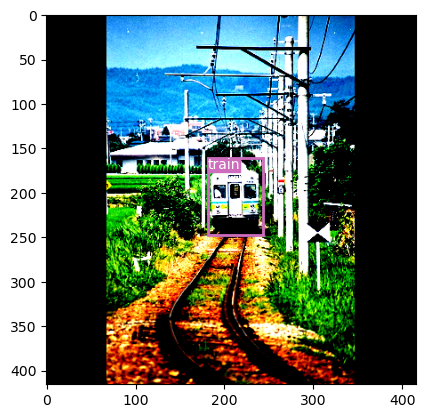

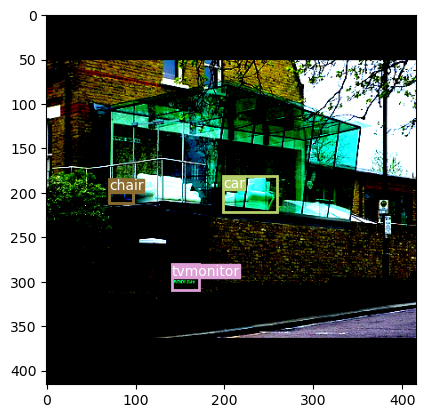

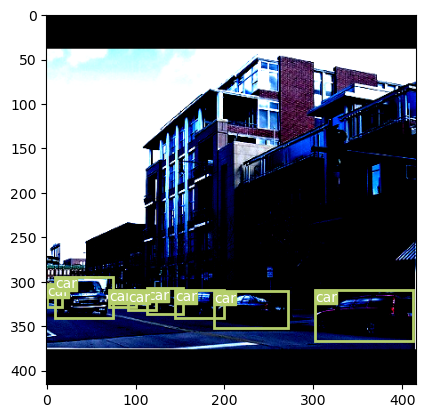

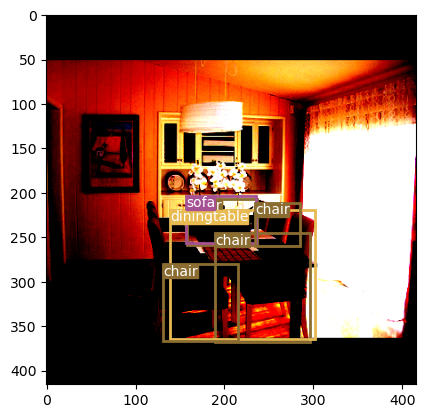

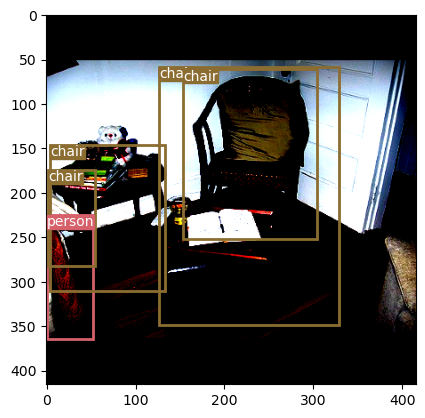

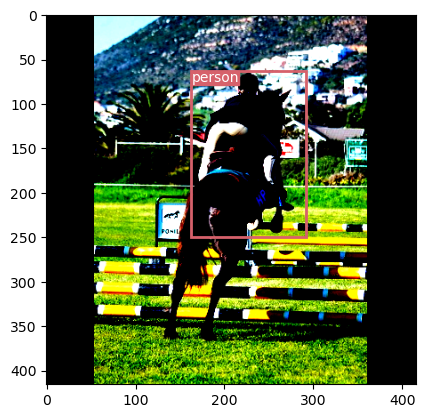

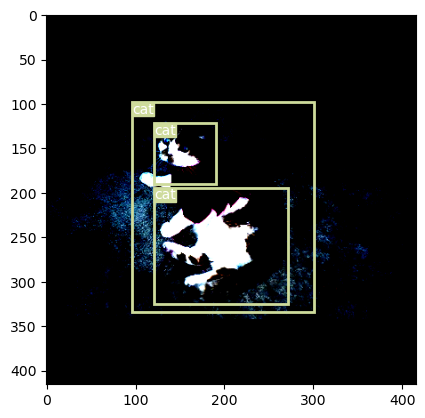

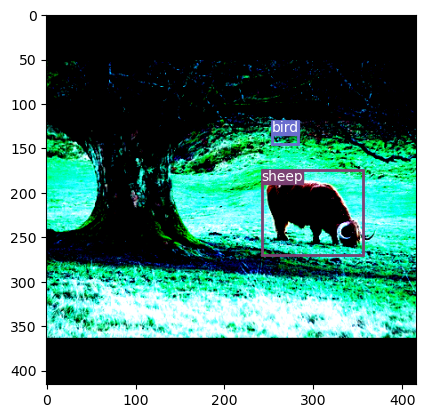

On Train loader:



100%|██████████| 518/518 [11:38<00:00,  1.35s/it]


Class accuracy is: 82.475861%
No obj accuracy is: 98.042297%
Obj accuracy is: 76.789825%
On Train Eval loader:



100%|██████████| 155/155 [01:08<00:00,  2.27it/s]


Class accuracy is: 87.750069%
No obj accuracy is: 98.226105%
Obj accuracy is: 77.375999%



100%|██████████| 155/155 [20:55<00:00,  8.10s/it]


MAP:0.43809619545936584


In [ ]:
# automatically restores model, epoch, step, LR schedulers, etc...
yolo3_trainer.fit(yolo3_model, ckpt_path=yolo3_last_checkpoint_path)

In [ ]:
yolo3_trainer.validate(yolo3_model)

Validation: 0it [00:00, ?it/s]

Val loss 3.8203446865081787


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │    3.8162038326263428     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 3.8162038326263428}]

In [ ]:
torch.save(yolo3_model.state_dict(), 'yolo3_trained_model_1.pth')